In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import (
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    classification_report,
    precision_recall_curve
)

In [2]:
data=fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [3]:
categories = fetch_20newsgroups().target_names
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)
print(train.data[500])


From: bjorndahl@augustana.ab.ca
Subject: Re: document of .RTF
Organization: Augustana University College, Camrose, Alberta
Lines: 10

In article <1993Mar30.113436.7339@worak.kaist.ac.kr>, tjyu@eve.kaist.ac.kr (Yu TaiJung) writes:
> Does anybody have document of .RTF file or know where I can get it?
> 
> Thanks in advance. :)

I got one from Microsoft tech support.

-- 
Sterling G. Bjorndahl, bjorndahl@Augustana.AB.CA or bjorndahl@camrose.uucp
Augustana University College, Camrose, Alberta, Canada      (403) 679-1100



In [4]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=train.target_names, yticklabels=train.target_names)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [5]:
print(len(train.data))

11314


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model=make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data,train.target)

label=model.predict(test.data)

              precision    recall  f1-score   support

           0       0.80      0.52      0.63       319
           1       0.81      0.65      0.72       389
           2       0.82      0.65      0.73       394
           3       0.67      0.78      0.72       392
           4       0.86      0.77      0.81       385
           5       0.89      0.75      0.82       395
           6       0.93      0.69      0.80       390
           7       0.85      0.92      0.88       396
           8       0.94      0.93      0.93       398
           9       0.92      0.90      0.91       397
          10       0.89      0.97      0.93       399
          11       0.59      0.97      0.74       396
          12       0.84      0.60      0.70       393
          13       0.92      0.74      0.82       396
          14       0.84      0.89      0.87       394
          15       0.44      0.98      0.61       398
          16       0.64      0.94      0.76       364
          17       0.93    

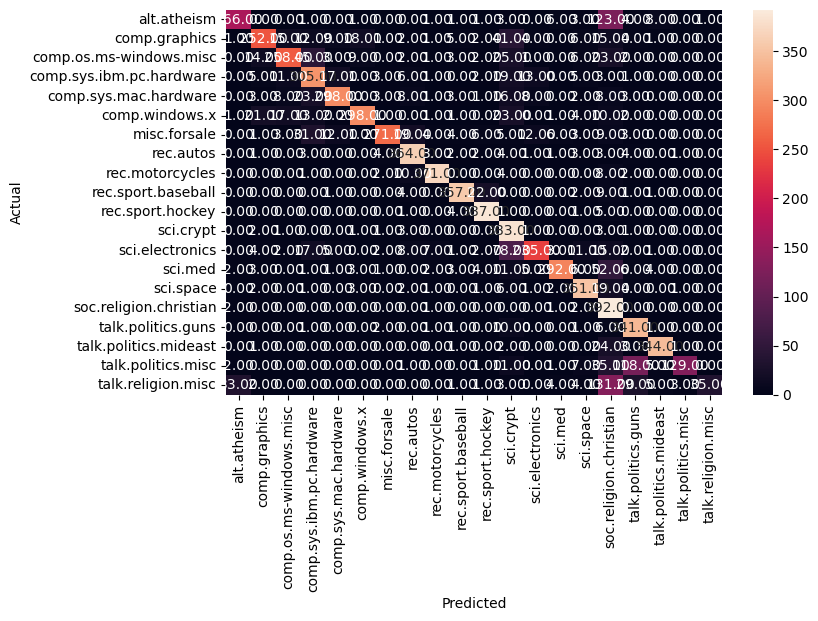

In [7]:
metrics_score(test.target,label)

In [8]:
def predict_catergories(s,train=train,model=model):
    pred=model.predict([s])
    return train.target_names[pred[0]]
    

In [9]:
predict_catergories('jesus christ')

'soc.religion.christian'

In [10]:
predict_catergories('international')

'sci.space'

In [11]:
label

array([ 7, 11,  0, ...,  9,  3, 15], dtype=int64)

In [12]:
pred=model.predict(['international'])

In [13]:
predict_catergories('football is good')

'rec.sport.baseball'

In [14]:
predict_catergories('food is good')

'sci.med'

In [15]:
predict_catergories('nigeria is a country')

'talk.politics.guns'

In [16]:
predict_catergories('donald triump is a democratic')

'rec.sport.baseball'

In [17]:
predict_catergories('data science is good')

'sci.crypt'

In [18]:
predict_catergories('chelsea is good')

'rec.sport.baseball'

In [19]:
predict_catergories('weapon')

'talk.politics.guns'

In [20]:
predict_catergories('hue')

'comp.windows.x'

In [21]:
from lightgbm import LGBMClassifier

In [22]:
model=make_pipeline(TfidfVectorizer(), LGBMClassifier())
model.fit(train.data,train.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('lgbmclassifier', LGBMClassifier())])

In [23]:
label=model.predict(test.data)

              precision    recall  f1-score   support

           0       0.78      0.68      0.73       319
           1       0.63      0.75      0.69       389
           2       0.72      0.73      0.72       394
           3       0.59      0.69      0.64       392
           4       0.75      0.80      0.78       385
           5       0.84      0.69      0.76       395
           6       0.84      0.89      0.87       390
           7       0.80      0.80      0.80       396
           8       0.90      0.86      0.88       398
           9       0.88      0.88      0.88       397
          10       0.95      0.88      0.92       399
          11       0.93      0.86      0.89       396
          12       0.55      0.71      0.62       393
          13       0.85      0.78      0.81       396
          14       0.91      0.88      0.89       394
          15       0.88      0.91      0.89       398
          16       0.67      0.85      0.75       364
          17       0.98    

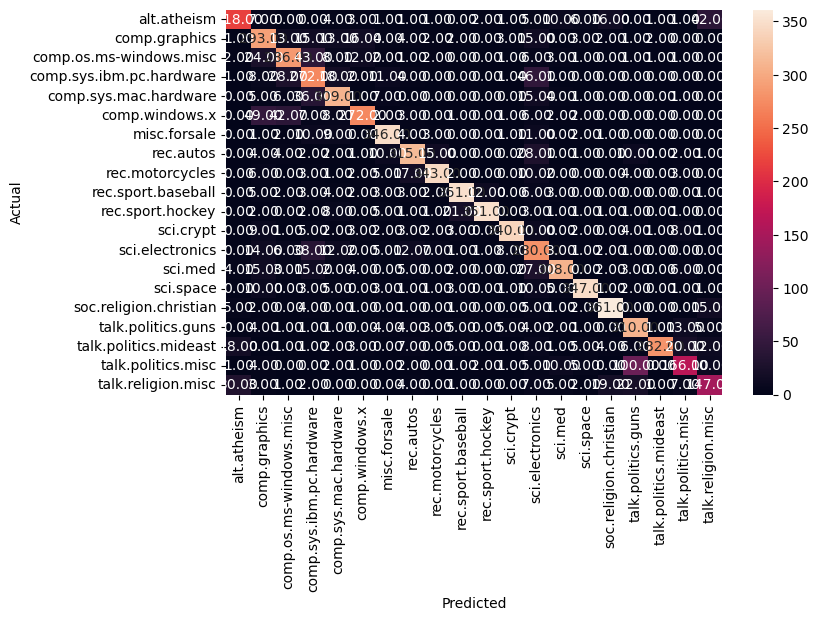

In [24]:
metrics_score(test.target,label)

In [25]:
def predict_catergories(s,train=train,model=model):
    pred=model.predict([s])
    return train.target_names[pred[0]]
    

In [26]:
predict_catergories('huip')

'comp.os.ms-windows.misc'

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [28]:
dtc=DecisionTreeClassifier()

In [29]:
model=make_pipeline(TfidfVectorizer(),dtc)
model.fit(train.data,train.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [30]:
label=model.predict(test.data)

              precision    recall  f1-score   support

           0       0.50      0.49      0.49       319
           1       0.44      0.42      0.43       389
           2       0.49      0.59      0.54       394
           3       0.45      0.43      0.44       392
           4       0.50      0.55      0.52       385
           5       0.50      0.47      0.48       395
           6       0.66      0.72      0.69       390
           7       0.62      0.59      0.60       396
           8       0.74      0.76      0.75       398
           9       0.57      0.54      0.55       397
          10       0.68      0.68      0.68       399
          11       0.75      0.70      0.72       396
          12       0.33      0.35      0.34       393
          13       0.53      0.46      0.49       396
          14       0.63      0.63      0.63       394
          15       0.70      0.70      0.70       398
          16       0.49      0.62      0.55       364
          17       0.74    

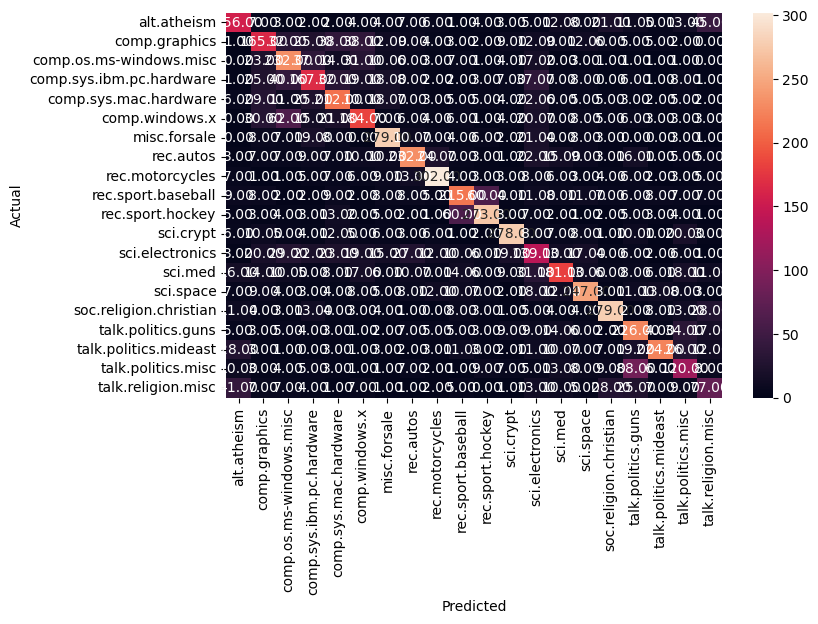

In [31]:
metrics_score(test.target,label)

In [32]:
model=make_pipeline(TfidfVectorizer(),RandomForestClassifier())
model.fit(train.data,train.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('randomforestclassifier', RandomForestClassifier())])

              precision    recall  f1-score   support

           0       0.73      0.64      0.68       319
           1       0.54      0.70      0.61       389
           2       0.65      0.78      0.71       394
           3       0.62      0.61      0.62       392
           4       0.75      0.77      0.76       385
           5       0.80      0.71      0.75       395
           6       0.72      0.92      0.81       390
           7       0.83      0.79      0.81       396
           8       0.90      0.89      0.90       398
           9       0.80      0.90      0.85       397
          10       0.89      0.92      0.91       399
          11       0.88      0.91      0.90       396
          12       0.67      0.49      0.57       393
          13       0.85      0.64      0.73       396
          14       0.82      0.87      0.85       394
          15       0.68      0.93      0.78       398
          16       0.66      0.87      0.75       364
          17       0.96    

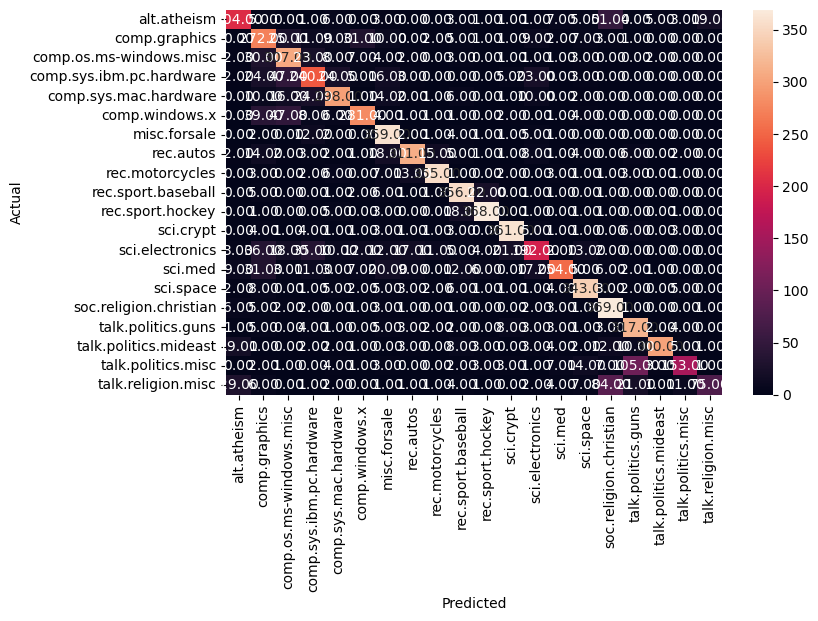

In [33]:
label=model.predict(test.data)
metrics_score(test.target,label)

In [34]:
from xgboost import XGBClassifier

              precision    recall  f1-score   support

           0       0.73      0.63      0.68       319
           1       0.54      0.70      0.61       389
           2       0.67      0.73      0.70       394
           3       0.65      0.64      0.64       392
           4       0.72      0.79      0.76       385
           5       0.78      0.71      0.74       395
           6       0.75      0.91      0.82       390
           7       0.82      0.80      0.81       396
           8       0.90      0.89      0.89       398
           9       0.81      0.89      0.85       397
          10       0.90      0.93      0.91       399
          11       0.89      0.91      0.90       396
          12       0.70      0.51      0.59       393
          13       0.82      0.66      0.73       396
          14       0.82      0.89      0.85       394
          15       0.69      0.94      0.79       398
          16       0.67      0.85      0.75       364
          17       0.94    

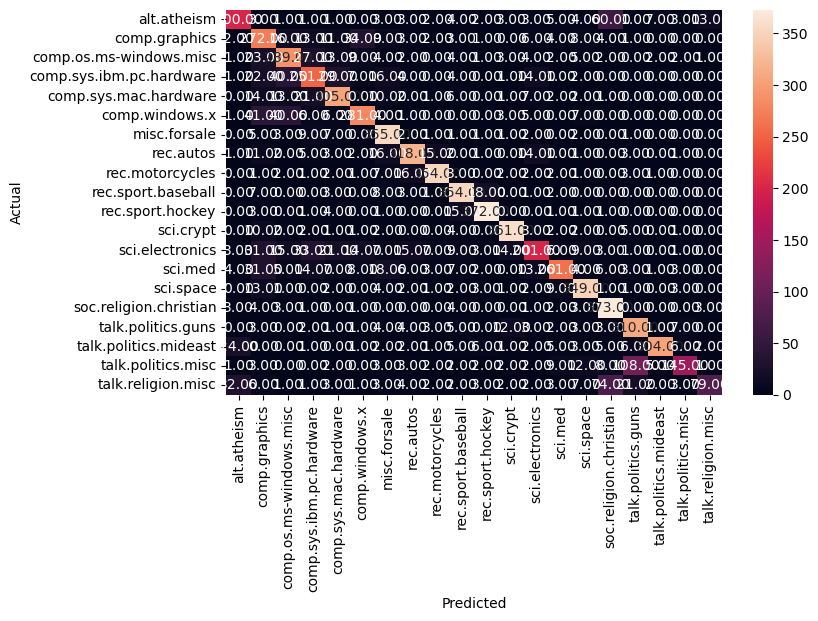

In [35]:
model=make_pipeline(TfidfVectorizer(),RandomForestClassifier())
model.fit(train.data,train.target)
label=model.predict(test.data)
metrics_score(test.target,label)